### PROJECT 1

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [86]:
df=pd.read_csv('https://raw.githubusercontent.com/Premalatha-success/-Practice/main/hotel_bookings.csv')


###  Q1.How Many Booking Were Cancelled?

In [87]:
Total_count = len(df[df['is_canceled'] == 1])
print('Total number of booking that were cancelled =', Total_count)

Total number of booking that were cancelled = 44224


### Q2.What is the booking ratio between Resort Hotel and City Hotel?

In [88]:
Resort_Hotel = len(df[df['hotel'] == 'Resort Hotel' ])
City_Hotel = len(df[df['hotel'] == 'City Hotel'])

print('Booking ratio between Resort hotel and City hotel =', Resort_Hotel,':',City_Hotel)

Booking ratio between Resort hotel and City hotel = 40060 : 79330


### Q3.What is the percentage of booking for each year?

In [89]:
years = pd.unique(df['arrival_date_year'])
total_count = len(df)

for i in years :
    print('Percentage of booking in the year', i ,'==' , (len(df[df['arrival_date_year'] == i])/total_count) * 100)

Percentage of booking in the year 2015 == 18.42365357232599
Percentage of booking in the year 2016 == 47.4972778289639
Percentage of booking in the year 2017 == 34.07906859871011


### Q4 Which is the busiest month for hotels?

In [90]:
sorted_months = df['arrival_date_month'].value_counts()
maxVal=sorted_months.max(skipna=False)
maxValueIndex = sorted_months.idxmax()
print("The busiest month for hotels:")
print(maxValueIndex)
print(maxVal)

The busiest month for hotels:
August
13877


### Q5 From which country most guests come ?

In [76]:
guests= df['country'].value_counts()
maxVal=guests.max(skipna=False)
maxValueIndex = guests.idxmax()
print("The country most guests come from =")
print(maxValueIndex)
print(maxVal)

The country most guests come from =
PRT
48590


### Q6. How Long People Stay in the hotel?

In [77]:
guests= df['stays_in_weekend_nights']+ df['stays_in_week_nights'].value_counts()
maxValueIndex = guests.idxmax()
print("How Long People Stay in the hotel =")
print(maxValueIndex)


How Long People Stay in the hotel =
2


### Q7. Which was the most booked accommodation type (Single, Couple, Family)?

In [78]:
single = len(df[ (df['adults'] == 1) & (df['children'] == 0) & (df['babies'] == 0)])
couple = len(df[ (df['adults'] == 2) & (df['children'] == 0) & (df['babies'] == 0)])
family = len(df[ (df['adults'] >= 1) & ((df['children'] >= 1) | (df['babies'] >= 1))])

print('Number of rooms booked by singles =' , single)
print('Number of rooms booked by couples =' , couple)
print('Number of rooms booked by family =' , family)

print('Overall the most booked accommdation type was = Couple')

Number of rooms booked by singles = 22577
Number of rooms booked by couples = 81557
Number of rooms booked by family = 9109
Overall the most booked accommdation type was = Couple


### Q8.Predictive model to make predictions in the future whether the booking will be cancelled or not

In [ ]:
df

In [79]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [80]:
df.shape

(119390, 32)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [82]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [83]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

<AxesSubplot:xlabel='is_canceled', ylabel='count'>

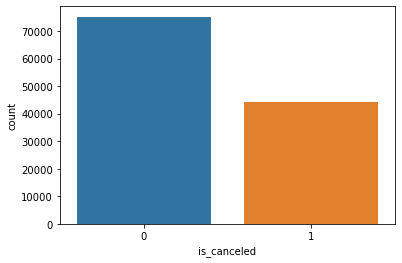

In [84]:
sns.countplot(x="is_canceled",data=df)